# Iris Lunar Rover — TVAC Testing Backend

Note: **Press the `green refresh button` then the `double play button` to reload and run.**

## Intro

This interface will allow you to issue commands and monitor the status of the rover. Functions you call here talk to the GSW backend and perform various analysis or debugging. Here's the set of tools available to you (note: they are also demoed below):

- `connect_serial(device_name)`: Initiate the connection with the rover over the RS-422 serial adapter.

- `send_command(command_name, **args)`: Send a command to the rover. `**args` means you enter the argument names and values in a list. For example: `send_command('WatchDogInterface_SetVSetpoint', setpoint=1000)`. Make sure to get the spelling of the command name *and* arg names correct. Note: some commands don't take arguments.

- `list_commands()`: List all commands you can send to the rover.

- `list_channels()`: List all telemetry channels which are being logged, both real and generated.

- `stream_data()`: Actively monitor and log data coming in from the rover. These logs are saved once per packet but only while this function is running. This should be your primary state.

- `plot_stream(channel_name)` Display a plot of all the data which has been logged for the channel with the given name.

<br/>

*Note:* If you want to prevent one of these functions from executing, you can comment it out by putting a `#` in front of it or pressing `ctrl + /` to toggle.

**Note:** You'll want to run `pyenv exec python tvac_telem.py` from this directory in a separate terminal window in order to collect telemetry during the test.

<br />

### Convenience functions:
The following functions exist to convert units. This is particularly for changing the heater settings. The heater takes it setpoint as an `adc` target and it returns its current state as an `adc` value as well.
- `degC_to_adc(temp)`: Converts a temperature in °Celcius to an `adc` target.
- `degK_to_adc(temp)`: Converts a temperature in °Kelvin to an `adc` target.
- `adc_to_degC(adc)`: Converts an `adc` reading into a temperature in °Celcius.
- `adc_to_degK(adc)`: Converts an `adc` reading into a temperature in °Kelvin.

**NOTE:** These conversions are only for °C and °K **not** C° or K°, which is to say, they're for absolute temperatures but not temperature differences - i.e. *dont* use these functions to set a window width for the heater.


## Setup:

In [1]:
from tvac_tools import *
connect_serial(device = '/dev/ttyUSB1')

search here: ../FlightSoftware/fprime/./CubeRover/Top/CubeRoverTopologyAppAi.xml
Connection Success!


In [2]:
settings['SAVE_FILE_PREFIX'] = 'iris_tvac_dry_ice_v3_log' # this the prefix on all log files. make it something unique.
load_cache()

## Info:

In [3]:
list_commands()
list_channels()


	0.	'WatchDogInterface_ResetSpecific', args: [reset_value: enum/*int32*/]

			Available values for `reset_value`:

				'NO_RESET' or 0 or 0x0

				'RESET_HERCULES' or 1 or 0x1

				'HERCULES_POWER_ON' or 2 or 0x2

				'HERCULES_POWER_OFF' or 3 or 0x3

				'RESET_RADIO' or 4 or 0x4

				'RADIO_POWER_ON' or 5 or 0x5

				'RADIO_POWER_OFF' or 6 or 0x6

				'RESET_FPGA' or 7 or 0x7

				'FPGA_POWER_ON' or 8 or 0x8

				'FPGA_POWER_OFF' or 9 or 0x9

				'RESET_MOTOR_1' or 10 or 0xa

				'RESET_MOTOR_2' or 11 or 0xb

				'RESET_MOTOR_3' or 12 or 0xc

				'RESET_MOTOR_4' or 13 or 0xd

				'RESET_ALL_MOTORS' or 14 or 0xe

				'ALL_MOTORS_ON' or 15 or 0xf

				'ALL_MOTORS_OFF' or 16 or 0x10

				'RESET_EN_3_3' or 17 or 0x11

				'EN_3_3_POWER_ON' or 18 or 0x12

				'EN_3_3_POWER_OFF' or 19 or 0x13

				'RESET_24_EN' or 20 or 0x14

				'EN_24_ON' or 21 or 0x15

				'EN_24_OFF' or 22 or 0x16

				'HDRM_OFF' or 24 or 0x18

				'FPGA_CAM_0' or 25 or 0x19

				'FPGA_CAM_1' or 26 or 0x1a

				'BATTE

## Initial Setup Commands to Send:


In [4]:
send_command('WatchDogInterface_SwitchToKeepAliveMode', confirm='YES') # should already be in KeepAlive, just double checking

'Data: 45 00 00 27 00 01 00 00 40 11 5e 27 de ad be ef 7f 00 00 01 00 35 1f 90 00 13 71 8c 00 07 00 00 ee ff 00 c0 eb 10 77.'

In [5]:
send_command('WatchDogInterface_ResetSpecific', reset_value='ENABLE_HEATER_CONTROL') # despite the name 'reset', this allows the heater to turn on

'Data: 45 00 00 27 00 01 00 00 40 11 5e 27 de ad be ef 7f 00 00 01 00 35 1f 90 00 13 b4 8d 00 07 00 00 ee ff 00 c0 00 10 1f.'

In [6]:
send_command('WatchDogInterface_SetHeaterSetpoint', adc_setpoint=degC_to_adc(25))

'Data: 45 00 00 28 00 01 00 00 40 11 5e 26 de ad be ef 7f 00 00 01 00 35 1f 90 00 14 f0 82 00 08 00 00 ee ff 00 c0 da 10 09 07.'

In [7]:
Tcenter = 25 # degC
DTwindow = 1 # degC
adc_upper = degC_to_adc(Tcenter+DTwindow)
adc_lower = degC_to_adc(Tcenter-DTwindow)
adc_half_width = 60#int((adc_lower-adc_upper)//2)
print(adc_half_width)

send_command('WatchDogInterface_SetHeaterWindow', adc_half_width=adc_half_width)

60


'Data: 45 00 00 28 00 01 00 00 40 11 5e 26 de ad be ef 7f 00 00 01 00 35 1f 90 00 14 e8 89 00 08 00 00 ee ff 00 c0 af 10 3c 00.'

In [8]:
#send_command('WatchDogInterface_SetHeaterDutyCyclePeriod', period=12000)
send_command('WatchDogInterface_SetHeaterDutyCycleMax', limit=5000)

'Data: 45 00 00 28 00 01 00 00 40 11 5e 26 de ad be ef 7f 00 00 01 00 35 1f 90 00 14 9e 76 00 08 00 00 ee ff 00 c0 ad 10 88 13.'

In [9]:
send_command('WatchDogInterface_SetKpSpecific', value=0xBEEF) # default Kp is waay too small. change to something big to make it actually repsond

'Data: 45 00 00 28 00 01 00 00 40 11 5e 26 de ad be ef 7f 00 00 01 00 35 1f 90 00 14 39 cb 00 08 00 00 ee ff 00 c0 aa 10 ef be.'

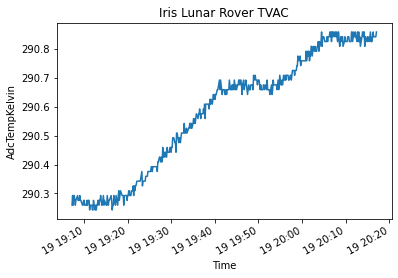

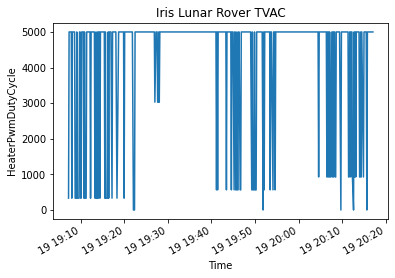

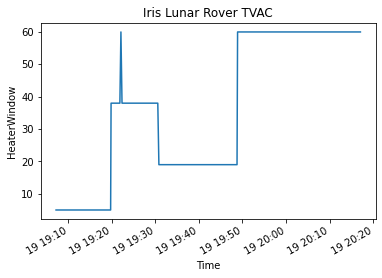

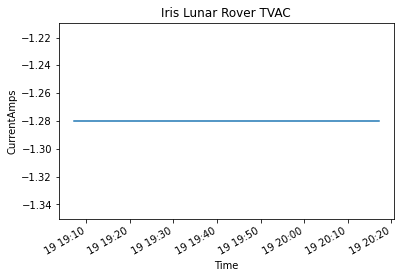

In [10]:
plot_stream('AdcTempKelvin')
plot_stream('HeaterPwmDutyCycle')
plot_stream('HeaterWindow')

In [11]:
stream_data()

2021-04-19 20:16:45 hermes IrisBackendv3.codec.logging[6459] WARNING Invalid packet detected. Does not conform to any supported specs: b'\n\x00\x06'
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	290.8°K -> 298.1°K +- 1.15K° 	Kp = 48879 @ Duty Cycle: 5000/65535
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 

KeyboardInterrupt: 

# Sample:
RS_KEEPALIVE:	[Heat: ON, Ctrl: ON] 	296.2°K -> 313.1°K +- 1.67K° 	Kp = 48879 @ Duty Cycle: 0/65535